In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy import interpolate

In [30]:
#Измерения, основанные на сдвиге 
tau = np.array([10, 9, 8, 8.4, 7.6, 9.2, 9.6, 10, 12, 12.4])*10**(-6)
nu = np.array([4, 8.137, 12.155, 16.237, 20, 24.045, 27.993, 32.047, 36.018, 38.071])*10**3
fi = tau * nu * 2 * np.pi
print(np.rad2deg(fi))

[ 14.4       26.36388   35.0064    49.100688  54.72      79.63704
  96.743808 115.3692   155.59776  169.948944]


In [31]:
sin = np.array([3.5/17, 7.5/17, 10.5/17.3, 13/17, 14.5/18, 17.2/17.6, -19/19.3, -16.5/18, -2.5/8.7, -11/90])
fis = []
for i in sin:
    if np.arcsin(i) > 0:
        fis.append(np.arcsin(i))
    else:
        fis.append(np.pi + np.arcsin(i))
print(np.rad2deg(fis))

[ 11.88115602  26.1789687   37.36831403  49.8808331   53.66394249
  77.76124423 100.11541653 113.55646431 163.30025112 172.97962925]


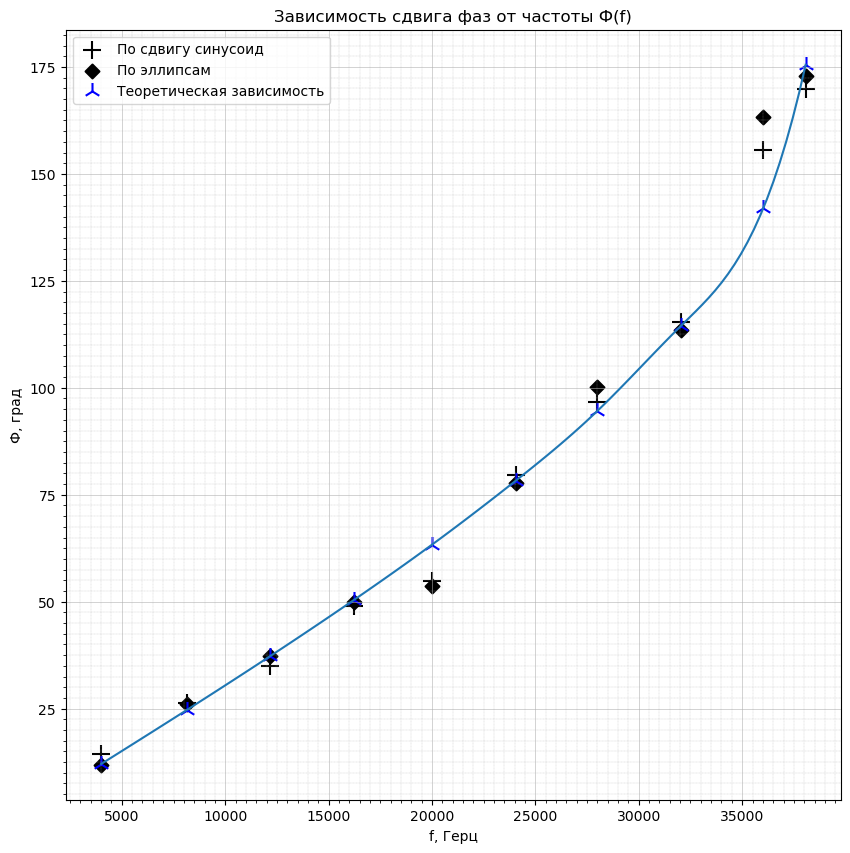

In [50]:
xpoints = np.linspace(-5, 5, 11)
x = np.linspace(4000, 38071, 110)
nu0 = 38100
fig, axs = plt.subplots(1,1, figsize = (10,10))
axs.set_title("Зависимость сдвига фаз от частоты Ф(f)")
axs.set_xlabel("f, Герц")
axs.set_ylabel("Ф, град")
axs.scatter(nu, np.rad2deg(fi), s = 150, marker = "+", linewidths = 1.5, color = "black", label = "По сдвигу синусоид")
axs.scatter(nu, np.rad2deg(fis), s = 50, linewidths = 1.5, marker = "D", color = "black", label = "По эллипсам")
axs.scatter(nu, 2*np.rad2deg(np.arcsin(nu/nu0)), s = 150, marker = "2", linewidths = 1.5, color = "blue", label = "Теоретическая зависимость")
cubic = interpolate.interp1d(nu, 2*np.rad2deg(np.arcsin(nu/nu0)), kind="cubic")
y = cubic(x)
axs.plot(x, y)
cubical = interpolate.interp1d(nu, np.rad2deg(fis), kind="cubic")
y = cubical(x)
plt.legend()
#k, b = np.polyfit(xpoints, interf, 1)
#y = k*x+b
#axs.plot(x, y)
#axs.xaxis.set_major_locator(MultipleLocator(1))
#axs.yaxis.set_major_locator(MultipleLocator(50))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.grid(which = 'minor', linestyle='--', linewidth = 0.2)
plt.grid(which = 'major', linewidth = 0.4)

In [53]:
def qu(w, w1, w2):
    return w0/(w2-w1)

In [54]:
w10 = np.array([2.3, 7.9, 13.3]) 
w20 = np.array([3.4, 9.1, 14.7]) 
w0 = np.array([2.8, 8.5, 14])
print(qu(w0, w10, w20))

[ 2.54545455  7.08333333 10.        ]


In [58]:
nuteor0 = [nu0 * np.sin(i*np.pi/20) for i in range(1, 10)]
print(nuteor0)

[5960.153118032797, 11773.547485685496, 17297.03804007673, 22394.618112343225, 26940.768363207462, 30823.547485685496, 33947.34857157681, 36235.25327084535, 37630.92577667475]


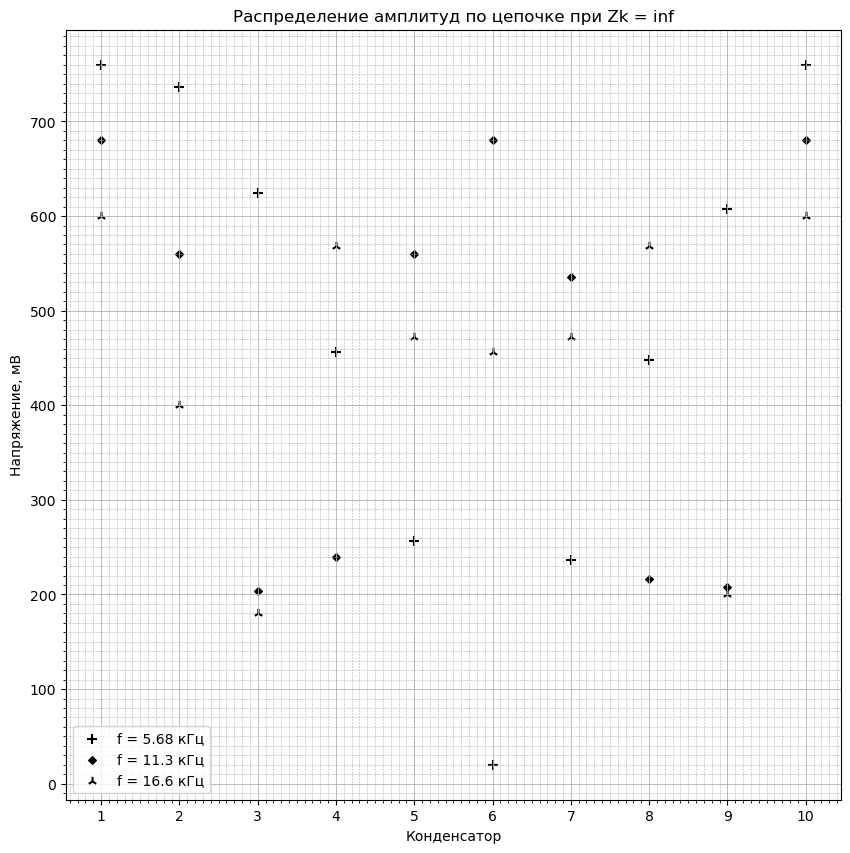

In [73]:
fbesk = np.array(["f = 5.68 кГц", "f = 11.3 кГц", "f = 16.6 кГц"])
N = np.array(range(1, 11))
ubesk = [np.array([760, 736, 624, 456, 256, 20, 236, 448, 608, 760]),
         np.array([680, 560, 204, 240, 560, 680, 536, 216, 208, 680]), 
         np.array([600, 400, 180, 568, 472, 456, 472, 568, 200, 600])]
m = ["+", "D", "2"]
sz = [45, 15, 45]
fig, axs = plt.subplots(1,1, figsize = (10,10))
for i in range(0, 3):
    axs.scatter(N, ubesk[i], marker = m[i], s = sz[i], label = fbesk[i], color = "black")
axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)
axs.set_title("Распределение амплитуд по цепочке при Zk = inf")
axs.set_xlabel("Конденсатор")
axs.set_ylabel("Напряжение, мВ")
axs.legend()
plt.show()

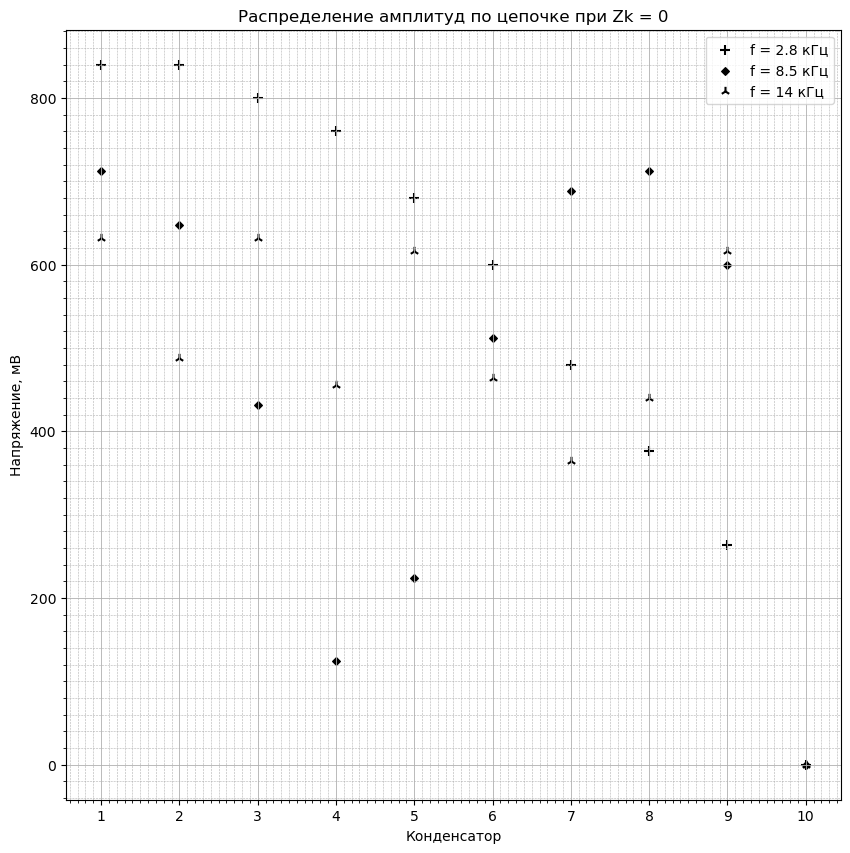

In [74]:
f0 = np.array(["f = 2.8 кГц", "f = 8.5 кГц", "f = 14 кГц"])
N = np.array(range(1, 11))
u0 = [np.array([840, 840, 800, 760, 680, 600, 480, 376, 264, 0]),
         np.array([712, 648, 432, 124, 224, 512, 688, 712, 600, 0]), 
         np.array([632, 488, 632, 456, 616, 464, 364, 440, 616, 0])]
m = ["+", "D", "2"]
sz = [45, 15, 45]
fig, axs = plt.subplots(1,1, figsize = (10,10))
for i in range(0, 3):
    axs.scatter(N, u0[i], marker = m[i], s = sz[i], label = f0[i], color = "black")
axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)
axs.set_title("Распределение амплитуд по цепочке при Zk = 0")
axs.set_xlabel("Конденсатор")
axs.set_ylabel("Напряжение, мВ")
axs.legend()
plt.show()

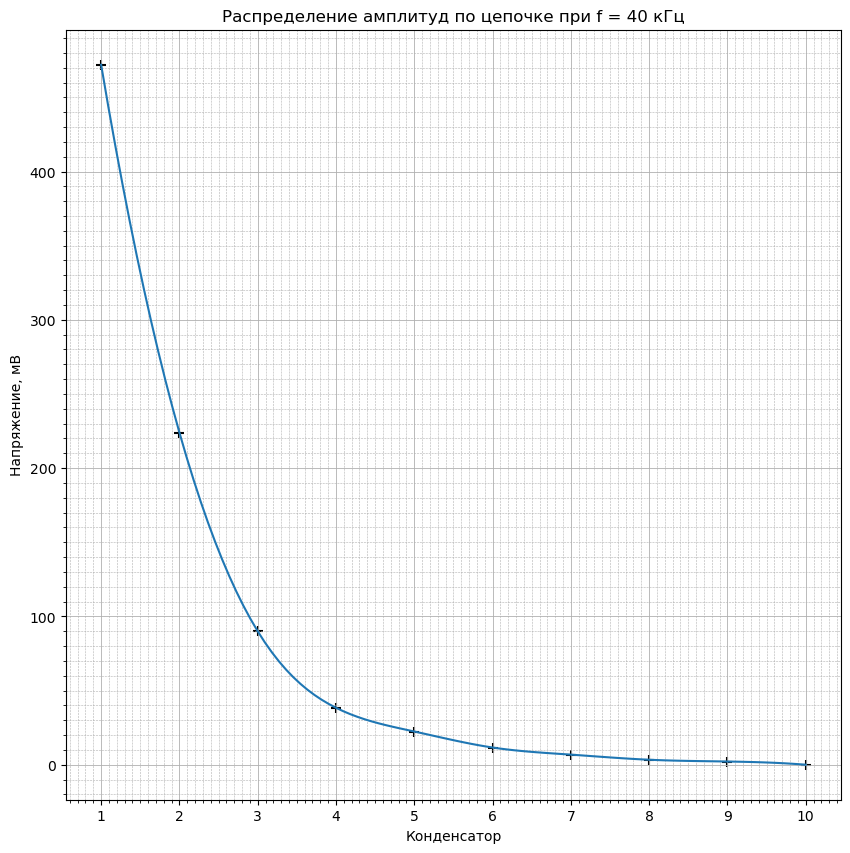

In [79]:
#fbesk = np.array(["f = 2.8 кГц", "f = 8.5 кГц", "f = 14 кГц"])
N = np.array(range(1, 11))
uz = np.array([472, 224, 90, 38.4, 22.4, 11.6, 6.8, 3.36, 2.16, 0])
fig, axs = plt.subplots(1,1, figsize = (10,10))
axs.scatter(N, uz, marker = "+", s = 45, color = "black")
axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)
axs.set_title("Распределение амплитуд по цепочке при f = 40 кГц")
axs.set_xlabel("Конденсатор")
axs.set_ylabel("Напряжение, мВ")
x = np.linspace(1, 10, 100)
cubic = interpolate.interp1d(N, uz, kind="cubic")
y = cubic(x)
axs.plot(x, y)
plt.show()

In [101]:
decz = np.array([])
for i in range(1, 9):
    decz = np.append(decz, np.log(uz[i]/uz[i-1]))
np.mean(decz)

-0.6733588454861852

In [103]:
decr = 2*np.arccosh(40/38)
decr

0.6460728785436062

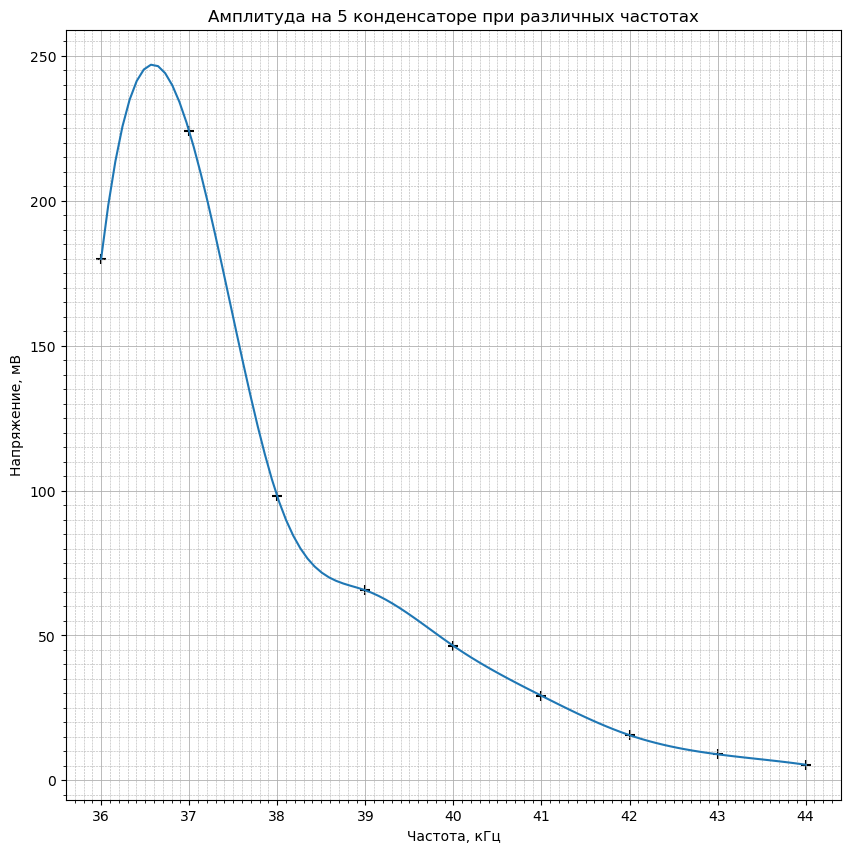

In [105]:
#fbesk = np.array(["f = 2.8 кГц", "f = 8.5 кГц", "f = 14 кГц"])
f = np.array(range(36, 45))
A = np.array([180, 224, 98.0, 65.6, 46.4, 29.2, 15.6, 9, 5.4])
fig, axs = plt.subplots(1,1, figsize = (10,10))
axs.scatter(f, A, marker = "+", s = 45, color = "black")
axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))
plt.grid(which = 'minor', linestyle='--', linewidth = 0.4)
plt.grid(which = 'major', linewidth = 0.6)
axs.set_title("Амплитуда на 5 конденсаторе при различных частотах")
axs.set_xlabel("Частота, кГц")
axs.set_ylabel("Напряжение, мВ")
x = np.linspace(36, 44, 100)
cubic = interpolate.interp1d(f, A, kind="cubic")
y = cubic(x)
axs.plot(x, y)
plt.show()